# Universidad Pólitecnica Salesiana
### Nombre: Angel Jadan

- La persona llega 20 minutos antes de la hora de vacunacion
- Ingresa a la cola/fila a que toque su turno
- Tenemos un proceso de control en donde se toma los signos vitales y se valida que este dentro del padron (2-5 minutos)
- Se procede al traslado a la cama/silla de vacunacion y se inyecta la dosis de la vacuna este proceso tarde entre (5-10 minutos).
- Finalmente llevados a la salida entre (1-3 minutos).

Finalmente generar las siguientes metricas/graficas:
- Tiempo de espera promedio para cada persona.
- Tiempo promedio total que requiere un paciente para ser vacunado.
- Cuantos pacientes se atendieron.
- Cuantos pacientes se quedaron sin atender.

In [131]:
import simpy
import random
import matplotlib.pyplot as pp


In [132]:
# Maximo de vehiculos que puede recibir el negocio
MAX_VACUNAS = 57
# Total de numero de mesas para vacunacion
NUM_MESAS = 3
PACIENTES = 300
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 20 #minutos
# Tiempo de simulación
TIEMPO_SIMULACION = 480 #Minutos = 8 horas
INTERVALO = 10

# Creamos un diccionario para almacenar las horas en que se vacuna los pacientes
tiempo_vacunacion={}
#Diccionario para el numero de pacientes que han sido atendidos
p_vacunado =[]
#Diccionario para el numero de pacientes que no han sido atendidos
p_no_vacunado = []

class Punto(object):
    
    def __init__(self, environment, num_mesas, nombre):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.mesas = simpy.Resource(environment, num_mesas)
        self.nombre = nombre
        
    #Proceso de control, para toma de signos vitales y valida estar dentro del padron
    def control_paciente(self, paciente):
        t_con = random.randint(2,5)
        yield self.env.timeout(t_con)
            
    #Para traslado a la cama/silla de vacunacion y se inyecta
    def vacunar_paciente(self, paciente):
        t_vacunacion = random.randint(5,10)
        print("Tiempo tomado: ",t_vacunacion," para paciente: ",paciente)
        yield self.env.timeout(t_vacunacion)
        
        k = int(paciente.strip('Paciente-'))
        print("Paciente ",k)
        if k in tiempo_vacunacion:
            tiempo_vacunacion[k]=tiempo_vacunacion[k]+1
        else:
            tiempo_vacunacion[k]=t_vacunacion
            
    #Traslado para la salida del paciente
    def salida_paciente(self,paciente):
        t_salida = random.randint(1,3)
        yield self.env.timeout(t_salida)
        
        
       
    
def llegada_paciente(env, nombre,punto):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega el paciente: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with punto.mesas.request() as mesa:
        # Ocupamos la mesa de vacunacion
        yield mesa
        #Indicamos que el paciente se esta trasladando para ser vacunado
        print('Se traslada el paciente: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del paciente
        yield env.process(punto.control_paciente(nombre))
        
        estado = random.randint(1,2)
        print("Sintomas: ",estado)
        if estado == 1:            
            p_no_vacunado.append(nombre)
            
        else:
            # Indicamos que paciente ingresa a la mesa de vacunacion
            print('Ingresa el paciente a las %s a la hora %.2f.' % (nombre, env.now))
            
            # Se realiza la vacunacion
            yield env.process(punto.vacunar_paciente(nombre))
            # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
            print('Paciente [%s] vacunado a las %.2f.' % (nombre, env.now))
            p_vacunado.append(nombre)
            
        yield env.process(punto.salida_paciente(nombre))
        print('Paciente [%s] trasladado a la salida a las %.2f.' %(nombre,env.now))
        
        
def ejecutar_simulacion(env,num_mesas, pacientes,intervalo):
    punto = Punto(env,num_mesas,"Cuenca 1")
    for i in range(pacientes):
        env.process(llegada_paciente(env,'Paciente-%d'%(i+1),punto))
    while True:
        yield env.timeout(random.randint(intervalo-10,intervalo+10))
        i+=1
        env.process(llegada_paciente(env,'Paciente-%d'%(i+1),punto))
    
print("Punto de vacunacion Cuenca 1")

# Creamos el entorno de simulacion
env=simpy.Environment()
print("pacientes ", PACIENTES)
env.process(ejecutar_simulacion(env, NUM_MESAS,PACIENTES,INTERVALO))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)



Punto de vacunacion Cuenca 1
pacientes  300
Llega el paciente: Paciente-1 a la hora 0.00.
Llega el paciente: Paciente-2 a la hora 0.00.
Llega el paciente: Paciente-3 a la hora 0.00.
Llega el paciente: Paciente-4 a la hora 0.00.
Llega el paciente: Paciente-5 a la hora 0.00.
Llega el paciente: Paciente-6 a la hora 0.00.
Llega el paciente: Paciente-7 a la hora 0.00.
Llega el paciente: Paciente-8 a la hora 0.00.
Llega el paciente: Paciente-9 a la hora 0.00.
Llega el paciente: Paciente-10 a la hora 0.00.
Llega el paciente: Paciente-11 a la hora 0.00.
Llega el paciente: Paciente-12 a la hora 0.00.
Llega el paciente: Paciente-13 a la hora 0.00.
Llega el paciente: Paciente-14 a la hora 0.00.
Llega el paciente: Paciente-15 a la hora 0.00.
Llega el paciente: Paciente-16 a la hora 0.00.
Llega el paciente: Paciente-17 a la hora 0.00.
Llega el paciente: Paciente-18 a la hora 0.00.
Llega el paciente: Paciente-19 a la hora 0.00.
Llega el paciente: Paciente-20 a la hora 0.00.
Llega el paciente: Pacien

Sintomas:  2
Ingresa el paciente a las Paciente-88 a la hora 294.00.
Tiempo tomado:  7  para paciente:  Paciente-88
Sintomas:  2
Ingresa el paciente a las Paciente-89 a la hora 294.00.
Tiempo tomado:  10  para paciente:  Paciente-89
Paciente  87
Paciente [Paciente-87] vacunado a las 296.00.
Paciente [Paciente-87] trasladado a la salida a las 297.00.
Se traslada el paciente: Paciente-90 a la hora 297.00.
Sintomas:  1
Paciente  88
Paciente [Paciente-88] vacunado a las 301.00.
Llega el paciente: Paciente-333 a la hora 303.00.
Paciente [Paciente-90] trasladado a la salida a las 303.00.
Se traslada el paciente: Paciente-91 a la hora 303.00.
Paciente  89
Paciente [Paciente-89] vacunado a las 304.00.
Paciente [Paciente-88] trasladado a la salida a las 304.00.
Se traslada el paciente: Paciente-92 a la hora 304.00.
Paciente [Paciente-89] trasladado a la salida a las 305.00.
Se traslada el paciente: Paciente-93 a la hora 305.00.
Sintomas:  1
Sintomas:  2
Ingresa el paciente a las Paciente-92 a l

[(2, 9), (3, 10), (4, 9), (5, 8), (6, 8), (10, 8), (11, 10), (12, 7), (13, 10), (16, 5), (17, 7), (18, 6), (22, 10), (23, 7), (24, 7), (26, 5), (27, 9), (29, 5), (30, 9), (31, 10), (32, 9), (34, 8), (35, 10), (36, 8), (37, 7), (38, 9), (41, 9), (43, 7), (45, 8), (46, 10), (47, 7), (49, 9), (50, 7), (53, 7), (54, 10), (55, 5), (56, 9), (57, 5), (58, 6), (63, 8), (64, 5), (67, 7), (69, 7), (73, 10), (75, 7), (76, 8), (77, 10), (78, 6), (79, 7), (80, 7), (84, 8), (85, 7), (87, 7), (88, 7), (89, 10), (92, 8), (95, 10), (98, 6), (99, 6), (100, 10), (101, 8), (102, 10), (106, 10), (108, 10), (109, 6), (110, 6), (111, 6), (113, 10), (115, 7), (116, 9), (119, 5), (121, 8), (125, 10), (126, 7), (127, 7), (128, 10), (132, 6), (136, 5), (137, 9), (138, 8), (139, 6)]


Text(0.5, 0, 'Tiempo tomado')

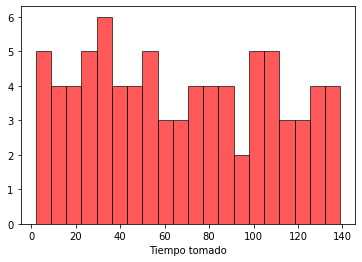

In [133]:
# Generamos la grafica
datos=sorted(tiempo_vacunacion.items())
print(datos)
x, y =zip(*datos)
result = pp.hist(x,bins=20,color='red',edgecolor='k',alpha=0.65)
pp.xlabel("Pacientes")
pp.xlabel("Tiempo tomado")


In [134]:
suma = 0
for val in tuple(tiempo_vacunacion.values()):
    suma = suma+val
print("Promedio de tiempo vacunacion",suma/len(tiempo_vacunacion))

Promedio de tiempo vacunacion 7.814814814814815


In [135]:
print("Total de pacientes que llegaron ",PACIENTES)
print("Vacunados ", len(p_vacunado))
print("No vacunados ", len(p_no_vacunado))
n_atendidos = PACIENTES-(len(p_vacunado)+len(p_no_vacunado))
print("Pacientes no atendidos",n_atendidos)

Total de pacientes que llegaron  300
Vacunados  81
No vacunados  62
Pacientes no atendidos 157
